In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 497.5 MB 18 kB/s 
     |████████████████████████████████| 462 kB 68.8 MB/s 


In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Part 2 - Now let's make the ANN!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.5))

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.5))

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [14]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 15s 15ms/step - loss: 0.7490 - accuracy: 0.6841 - val_loss: 0.5435 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 6s 11ms/step - loss: 0.5561 - accuracy: 0.7876 - val_loss: 0.5166 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 4s 7ms/step - loss: 0.5242 - accuracy: 0.7970 - val_loss: 0.5064 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 3s 6ms/step - loss: 0.5100 - accuracy: 0.7970 - val_loss: 0.5015 - val_accuracy: 0.7955
Epoch 5/50
536/536 [==============================] - 3s 6ms/step - loss: 0.5046 - accuracy: 0.7970 - val_loss: 0.5000 - val_accuracy: 0.7955
Epoch 6/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4936 - accuracy: 0.8005 - val_loss: 0.4907 - val_accuracy: 0.7955
Epoch 7/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4911 - accuracy: 0.7983 - val_loss: 0.4882 - val_accuracy: 0.7955
Epo

In [16]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


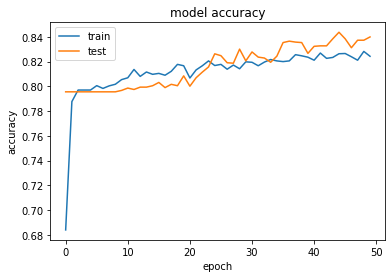

In [17]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

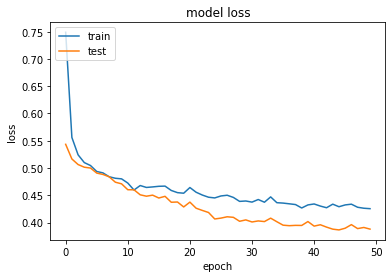

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1583,   12],
       [ 281,  124]])

In [22]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.846